In [1]:
%matplotlib widget

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Source data
mstr = pd.read_csv('data/mstr-usd.csv', index_col='Date', parse_dates=['Date'])
mstr_shares = pd.read_csv('data/mstr-shares.csv', index_col='Date', parse_dates=['Date'])
btc = pd.read_csv('data/btc-usd.csv', index_col='Date', parse_dates=['Date'])
holdings = pd.read_csv('data/holdings.csv', index_col='Date', parse_dates=['Date'])

In [4]:
# Union of dates in data
dates = pd.concat([pd.Series(mstr.index),
                   pd.Series(mstr_shares.index),
                   pd.Series(btc.index),
                   pd.Series(holdings.index)],
)
dates = pd.unique(dates)
dates.sort()
dates = dates[dates >= holdings.index[0]]  # trim anything before MSTR held BTC

In [5]:
# Sourced data
mstr = mstr.asof(dates, subset=[])
mstr_shares = mstr_shares.asof(dates, subset=[])
btc = btc.asof(dates, subset=[])
holdings = holdings.asof(dates, subset=[])

In [6]:
# Aggregated data
mstr_shares_cap = mstr['Close'] * mstr_shares['Shares']
mstr_btc_cap = holdings['TotalBTC'] * btc['Close']
mstr_prem = mstr_shares_cap/mstr_btc_cap

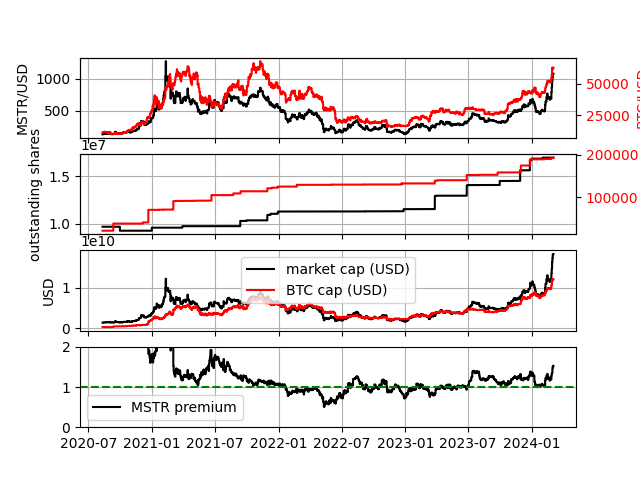

In [7]:
# Plot
fig, axes = plt.subplots(nrows=4, ncols=1, sharex=True)

# Row 0
ax_px_mstr = axes[0]
ax_px_btc = axes[0].twinx()
ax_px_mstr.grid()

ax_px_mstr.step(mstr.index, mstr['Close'], where='post', color='black')
ax_px_mstr.set_ylabel('MSTR/USD', color='black')
ax_px_mstr.tick_params(axis='y', labelcolor='black')

ax_px_btc.step(btc.index, btc['Close'], where='post', color='red')
ax_px_btc.set_ylabel('BTC/USD', color='red')
ax_px_btc.tick_params(axis='y', labelcolor='red')

# Row 1
ax_total_shares = axes[1]
ax_total_btc = axes[1].twinx()
ax_total_shares.grid()

ax_total_shares.step(mstr_shares.index, mstr_shares['Shares'], where='post', color='black')
ax_total_shares.set_ylabel('outstanding shares', color='black')
ax_total_shares.tick_params(axis='y', labelcolor='black')

ax_total_btc.step(holdings.index, holdings['TotalBTC'], where='post', color='red')
ax_total_btc.set_ylabel('BTC held', color='red')
ax_total_btc.tick_params(axis='y', labelcolor='red')

# Row 2
ax_cap = axes[2]
ax_cap.grid()

ax_cap.step(mstr_shares_cap.index, mstr_shares_cap, where='post', label='market cap (USD)', color='black')
ax_cap.step(mstr_btc_cap.index, mstr_btc_cap, where='post', label='BTC cap (USD)', color='red')
ax_cap.set_ylabel('USD', color='black')
ax_cap.legend()

# Row 3
ax_prem = axes[3]
ax_prem.grid()
ax_prem.set_ylim(0, 2)

ax_prem.step(mstr_prem.index, mstr_prem, where='post', label='MSTR premium', color='black')
ax_prem.axhline(y=1, color='green', linestyle='dashed')
ax_prem.legend()

plt.show()